In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
N = 10000
G = nx.Graph()
for i in range(1,N):
    G.add_edge(0,i)

def link_percolation(G, p):
    G_copy = G.copy()
    num_edge = len(G.edges())
    num_edge_deleted = round((1-p) * num_edge)
    edge_list = np.random.permutation(list(G.edges()))
    G_copy.remove_edges_from(edge_list[1:num_edge_deleted])
    comp_gen = nx.connected_components(G_copy)
    largest_cc = len(max(nx.connected_components(G_copy), key=len))
    R = (largest_cc/N)
    return R

list_R_mean = []
list_p = np.linspace(0,1,100)

for p in list_p:
    list_R = []
    for repeat in range(1):
        R = link_percolation(G, p)
        list_R.append(R)
    list_R_mean.append(np.mean(list_R)) 

G = nx.erdos_renyi_graph(N,(2*(N-1))/(N**2))  
list_R_meanER = []
list_pER = np.linspace(0,1,100)

for p in list_p:
    list_RER = []
    for repeat in range(1):
        R = link_percolation(G, p)
        list_RER.append(R)
    list_R_meanER.append(np.mean(list_RER)) 

G = nx.barabasi_albert_graph(N,((N-1))/(N**2))  
list_R_meanBA = []
list_pBA = np.linspace(0,1,100)

for p in list_p:
    list_RER = []
    for repeat in range(1):
        R = link_percolation(G, p)
        list_RBA.append(R)
    list_R_meanBA.append(np.mean(list_RBA)) 

NetworkXError: Barabási–Albert network must have m >= 1 and m < n, m = 9.999e-05, n = 10000

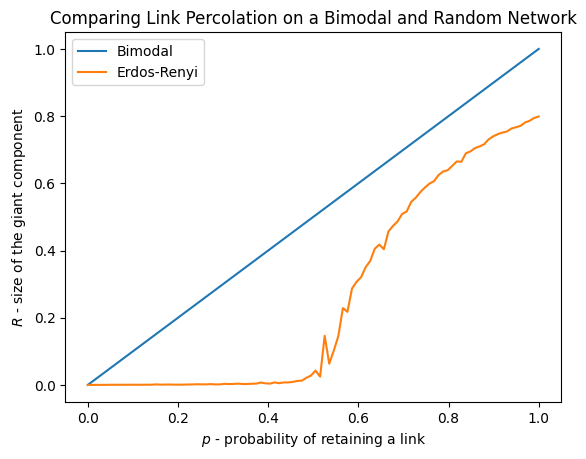

In [15]:
plt.plot(list_p,list_R_mean,label="Bimodal")
plt.plot(list_pER,list_R_meanER,label="Erdos-Renyi")
plt.title("Comparing Link Percolation on a Bimodal and Random Network")
plt.xlabel("$p$ - probability of retaining a link")
plt.ylabel("$R$ - size of the giant component")
plt.legend()
